Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.6032 - mae: 2.2081 - val_loss: 0.6979 - val_mae: 0.3379 - learning_rate: 0.0010
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6771 - mae: 0.3062 - val_loss: 0.5198 - val_mae: 0.2150 - learning_rate: 0.0010
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5190 - mae: 0.2202 - val_loss: 0.4547 - val_mae: 0.1946 - learning_rate: 0.0010
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4424 - mae: 0.1937 - val_loss: 0.3977 - val_mae: 0.1847 - learning_rate: 0.0010
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3923 - mae: 0.1753 - val_loss: 0.3454 - val_mae: 0.1625 - learning_rate: 0.0010
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3359 - mae: 0.1682 - val_loss: 0.3086 - val_mae: 0.1607 - learning_rate: 0.0010
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2914 - mae: 0.1571 - val_loss: 0.2801 - val_mae: 0.1740 - learning_rate: 0.0010
Epoch 8/20
239/23

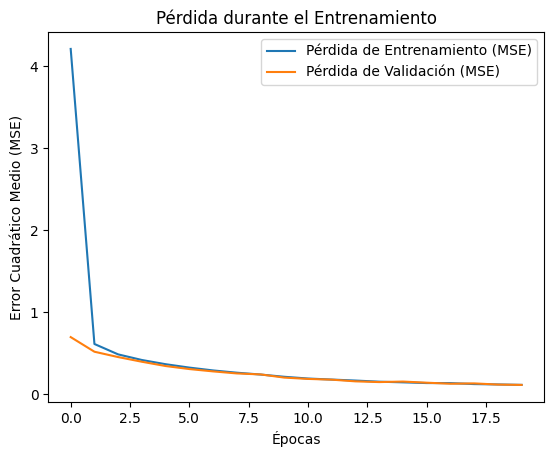

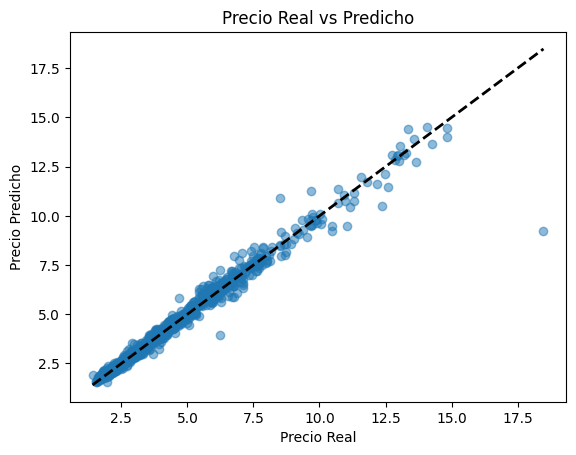

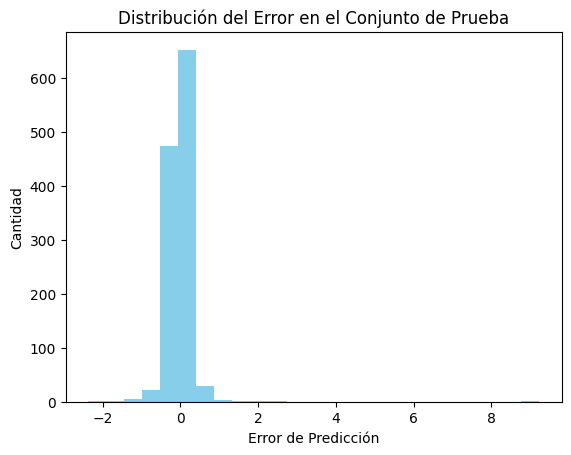

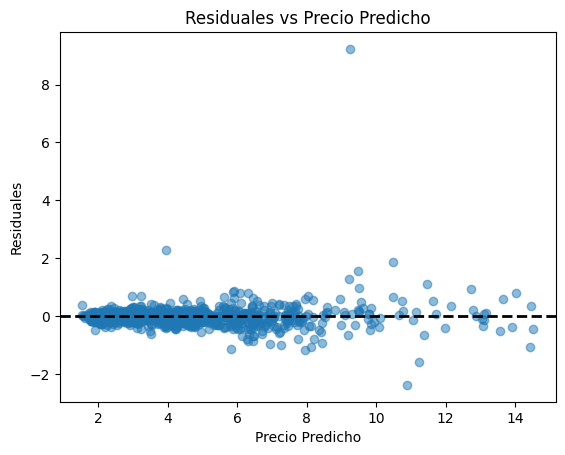

Importancia de las Características:
         Variable  Importancia
0   Price_7day_MA     2.342157
1  Price_30day_MA     0.072340
4     Price_Trend     0.048671
2       IsWeekend     0.001044
3        IsWinter    -0.000310


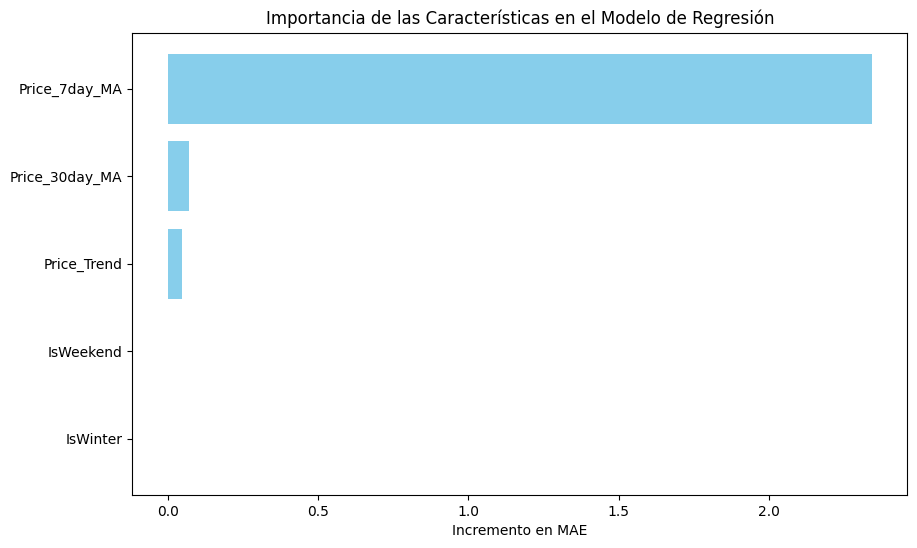

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


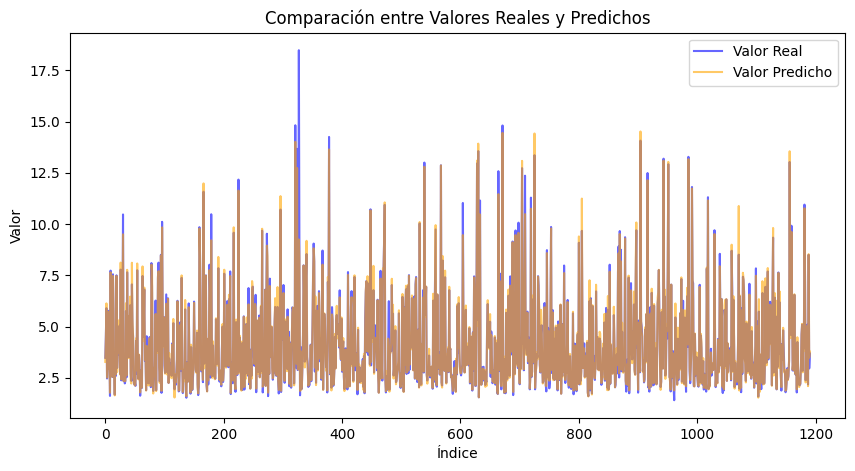

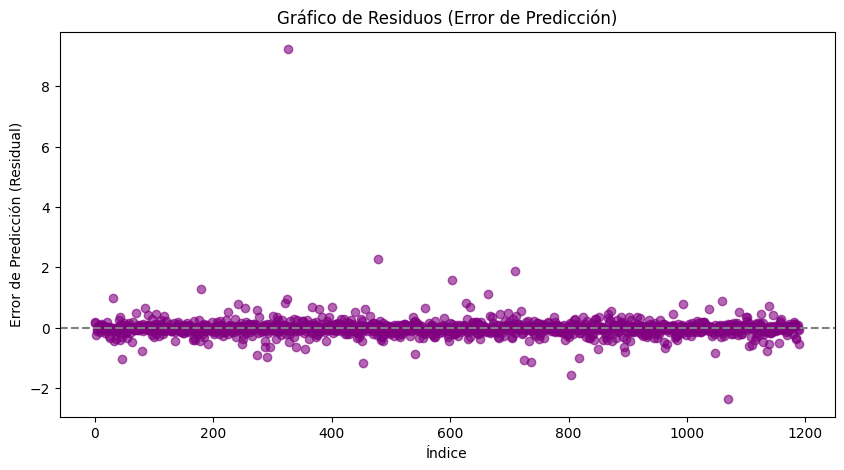

In [15]:
"""
 ENEB Maestría AI Aplicada
 Programadores: Miguel Raúl González y ChatGPT4o
 Modelo de predicción del precio del gas natural usando redes neuronales
 Dataset source: https://www.kaggle.com/datasets/joebeachcapital/natural-gas-prices?resource=download
 El dataset fue mejorado para obtener mejores resultados
 Fecha: 10 Nov 2024
"""

# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
data = pd.read_csv('daily_csv_enhanced_with_numeric_trend.csv')

# Seleccionar las columnas que son relevantes (independent variables) and la variable objetivo (dependent variable)
# esta selección es producto de una conclusión por una corrida previa en la que se
# pudo demostrar cuales eran las variables que afectaban el modelo considerablemente y cuales no por ej.
#  crisis o si era invierno
X = data[['Price_7day_MA', 'Price_30day_MA', 'IsWeekend', 'IsWinter', 'Price_Trend']]
y = data['Price']


# Manejar valores faltantes en X e y
X = X.fillna(X.median())
y = y.fillna(y.median())

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
 Escalar las características. Escalar significa ajustar los valores de las variables
 para que estén en un rango similar, facilitando el trabajo de la red neuronal.
 Evita que características con valores grandes dominen sobre las demás.
 Hace que el modelo sea más estable y eficiente al procesar los datos.
"""
scaler = StandardScaler()  #
X_train = scaler.fit_transform(X_train)  # Ajusta y transforma los datos de entrenamiento
X_test = scaler.transform(X_test)  # Transforma los datos de prueba utilizando los parámetros del conjunto de entrenamiento

"""
 Tomando en cuenta que el dataset es una serie de temporal estamos creando un modelo
 secuencial (Sequential) que organiza las capas de la
 red neuronal de manera lineal, de la primera capa hasta la última.
 Como queremos predecir el precio y el precio nunca puede ser negativo
 utilizamos la función relu para activar las neuronas.
 Esta función convierte las salidas de las neuronas en valores positivos,
 lo cual ayuda a que el modelo aprenda patrones complejos.
 Definimos el modelo de red neuronal con regularización L2 para regresión
 que una técnica que ayuda a prevenir el sobreajuste porque cuando el modelo se
 ajusta demasiado a los datos de entrenamiento entonces no generaliza bien.
 Usa linear en la capa de salida de 1 neurona , adecuada para
 predecir un valor continuo en un problema de regresión, como el precio.

"""

model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(units=32, activation='relu', kernel_regularizer=l2(0.01)),

    Dense(units=1, activation='linear')  # Capa se salida de activación lineal para regresión
])

"""
 Compilamos el modelo usando el error cuadrático medio (MSE) como pérdida y el error absoluto medio (MAE)
 como métrica para evaluar qué tan preciso es el modelo en promedio,
 en términos de unidades de error, sin que esta métrica afecte los ajustes de pesos del modelo.

 Para la función de pérdida, también llamada "función de coste" seleccionamos MSE o
 mean_squared_error  es adecuado para modelos de regresión, donde el objetivo
 es predecir valores continuos y queremos que el modelo tenga en cuenta tanto
 la precisión como la estabilidad.

 Aquí usamos el optimizador Adam (Adaptive Moment Estimation que va ajustando dinámicamente
 la tasa de aprendizaje para cada parámetro del modelo, lo cual ayuda a que el modelo converja
 de manera más rápida y estable.
"""
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

"""
 EarlyStopping: La detención temprana es una técnica que detiene el entrenamiento
 cuando el modelo ya no está mejorando, lo cual evita entrenar más de lo necesario
 y reduce el riesgo de sobreajuste (cuando el modelo se adapta demasiado a los datos de entrenamiento).
"""
# Definir el early stopping y el scheduler para reducir el learning rate
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

"""
 ReduceLROnPlateau: Este programador ajusta la tasa de aprendizaje (learning rate).
 El programador de tasa de aprendizaje reduce la velocidad de aprendizaje
 del modelo si este deja de mejorar, permitiéndole hacer ajustes más finos para alcanzar mejores resultados.
"""
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)


# Entrenar el modelo con early stopping y scheduler
history = model.fit(
    X_train, y_train,
    epochs=20,  # Reducido a 20 épocas, al principio eran 50
    batch_size=16,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, lr_scheduler] # Aqui estan las funciones para evitar el sobreentrenamiento
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print("Error Absoluto Medio (MAE) en el conjunto de prueba:", test_mae)

# Calcular el R² Score para medir el desempeño del modelo
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
print("R² Score en el conjunto de prueba:", r2)

# Graficar la pérdida durante el entrenamiento (MSE)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento (MSE)')
plt.plot(history.history['val_loss'], label='Pérdida de Validación (MSE)')
plt.xlabel('Épocas')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Pérdida durante el Entrenamiento')
plt.legend()
plt.show()

# Graficar Predicción vs Valor Real para evaluar la precisión del modelo
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precio Real vs Predicho')
plt.show()

# Graficar la distribución del error para observar los errores de predicción
errors = y_test - y_pred
plt.hist(errors, bins=25, color='skyblue')
plt.xlabel('Error de Predicción')
plt.ylabel('Cantidad')
plt.title('Distribución del Error en el Conjunto de Prueba')
plt.show()

# Graficar Residuales vs Predicción para evaluar si hay patrones en los errores
plt.scatter(y_pred, errors, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Precio Predicho')
plt.ylabel('Residuales')
plt.title('Residuales vs Precio Predicho')
plt.show()

"""
 Función para calcular la importancia de cada característica mediante permutación
 Esta función calcula qué tan importante es cada característica para el modelo:
 Permuta (desordena) los valores de cada característica en el conjunto de prueba y mide cuánto aumenta el error del modelo.
 Si desordenar una característica aumenta mucho el error, esa característica es importante.
 Si desordenar una característica no cambia mucho el error, entonces esa característica no es tan importante para las predicciones del modelo.
"""
def permutation_importance_manual(model, X_test, y_test, baseline_mae):
    importances = []
    for i, col in enumerate(X.columns):
        X_test_permuted = X_test.copy()
        X_test_permuted[:, i] = np.random.permutation(X_test_permuted[:, i])
        permuted_mae = model.evaluate(X_test_permuted, y_test, verbose=0)[1]
        importance = permuted_mae - baseline_mae
        importances.append(importance)
    return importances

# Calcular la importancia de cada característica
importances = permutation_importance_manual(model, X_test, y_test, test_mae)

# Organizar la importancia en un DataFrame y ordenar
importances_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Mostrar la importancia de cada característica
print("Importancia de las Características:")
print(importances_df)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Variable'], importances_df['Importancia'], color='skyblue')
plt.xlabel('Incremento en MAE')
plt.title('Importancia de las Características en el Modelo de Regresión')
plt.gca().invert_yaxis()
plt.show()

import matplotlib.pyplot as plt

# Generar las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(X_test).flatten()

# 1. Gráfico de Línea para Valores Reales vs. Predichos
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Valor Real", color="blue", alpha=0.6)
plt.plot(y_pred, label="Valor Predicho", color="orange", alpha=0.6)
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.show()

# 2. Gráfico de Residuos (Errores de Predicción)
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(range(len(residuals)), residuals, color="purple", alpha=0.6)
plt.axhline(y=0, color="grey", linestyle="--")
plt.xlabel("Índice")
plt.ylabel("Error de Predicción (Residual)")
plt.title("Gráfico de Residuos (Error de Predicción)")
plt.show()

